<a href="https://colab.research.google.com/github/RDLL/curso_ia/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación KNN

## Tarea 2

## Detección de insuficencia cardiaca

In [25]:
# Tratamiento de datos
#=========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sbn

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

# Preprocesado
#=========================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
pip install category_encoders

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/RDLL/curso_ia/main/heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:

def faltantes(data):
  ft = data.isnull().sum(min_count=1)
  ft = ft[ft != 0].to_dict()
  return ft

In [6]:
vfal = faltantes(df)
print(vfal)
porcentajes = vfal
for clave in vfal:
  porcentajes[clave] = (vfal[clave]/df.shape[0]) * 100
print(porcentajes)

{}
{}


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


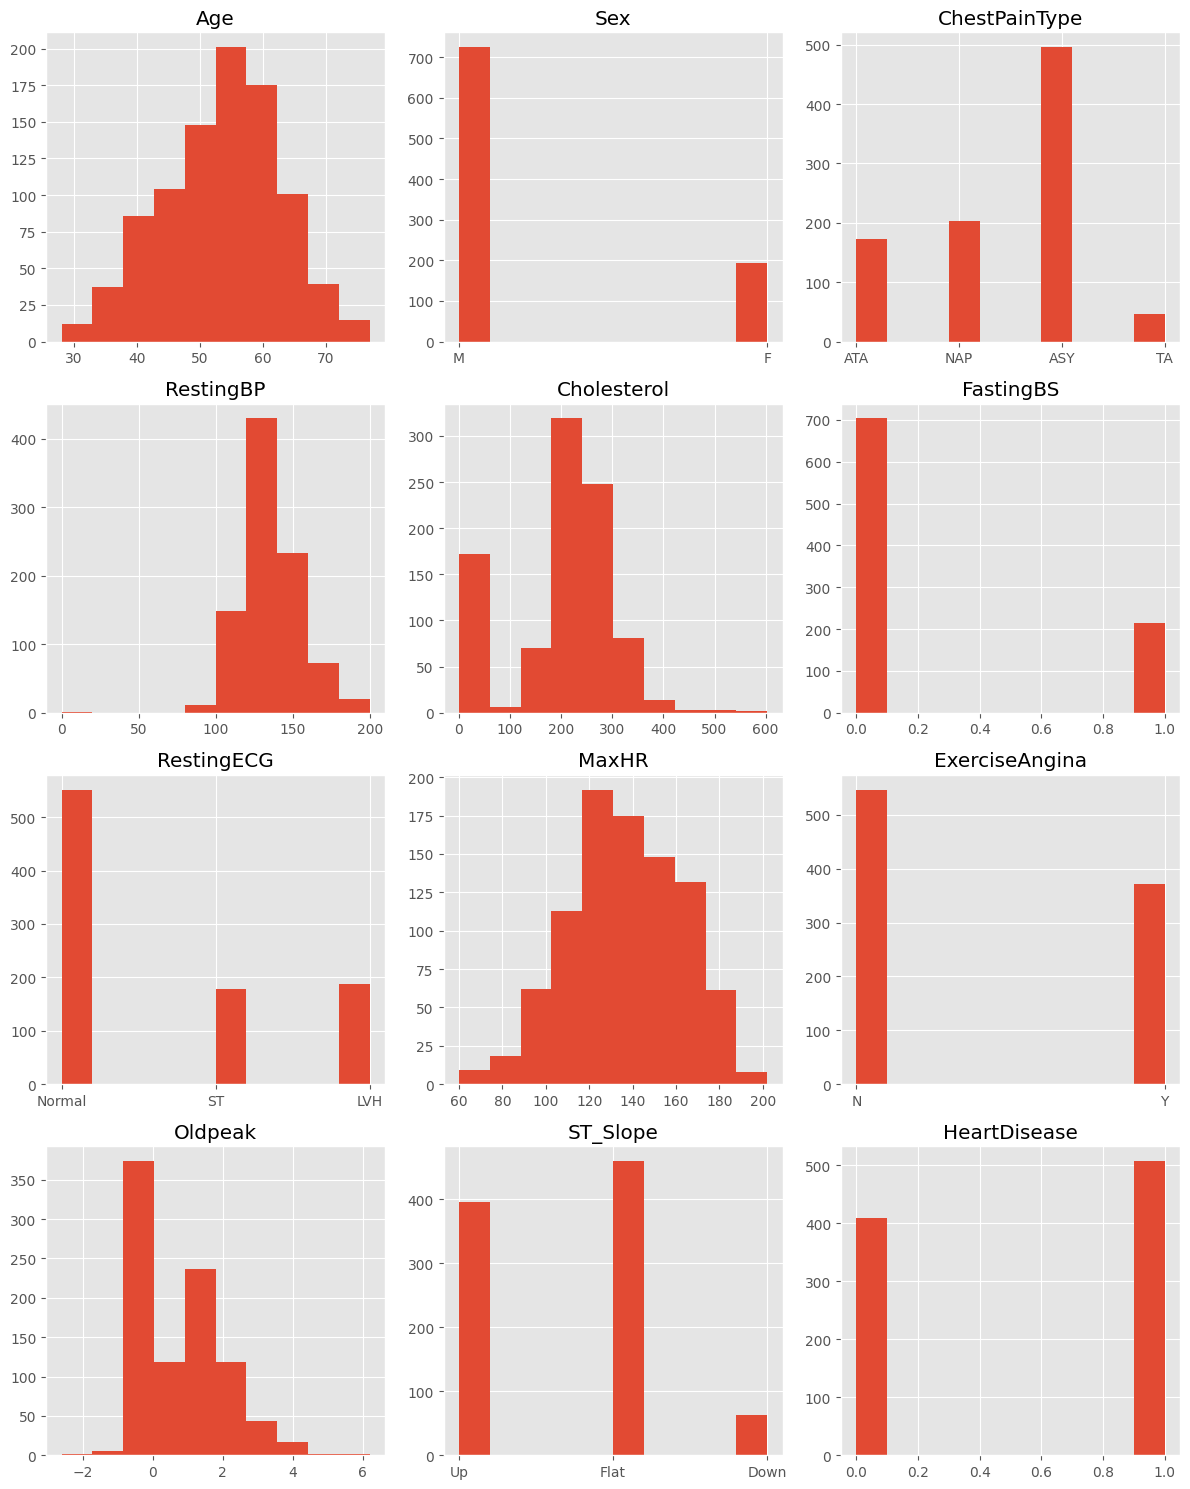

In [9]:
viz_df = df.copy()
k = 0
plt.figure(figsize=(12,15))
for col in viz_df.columns:
  plt.subplot(4,3,k+1)
  plt.hist(viz_df[col])
  plt.title(f"{col}")
  k+=1
plt.tight_layout()

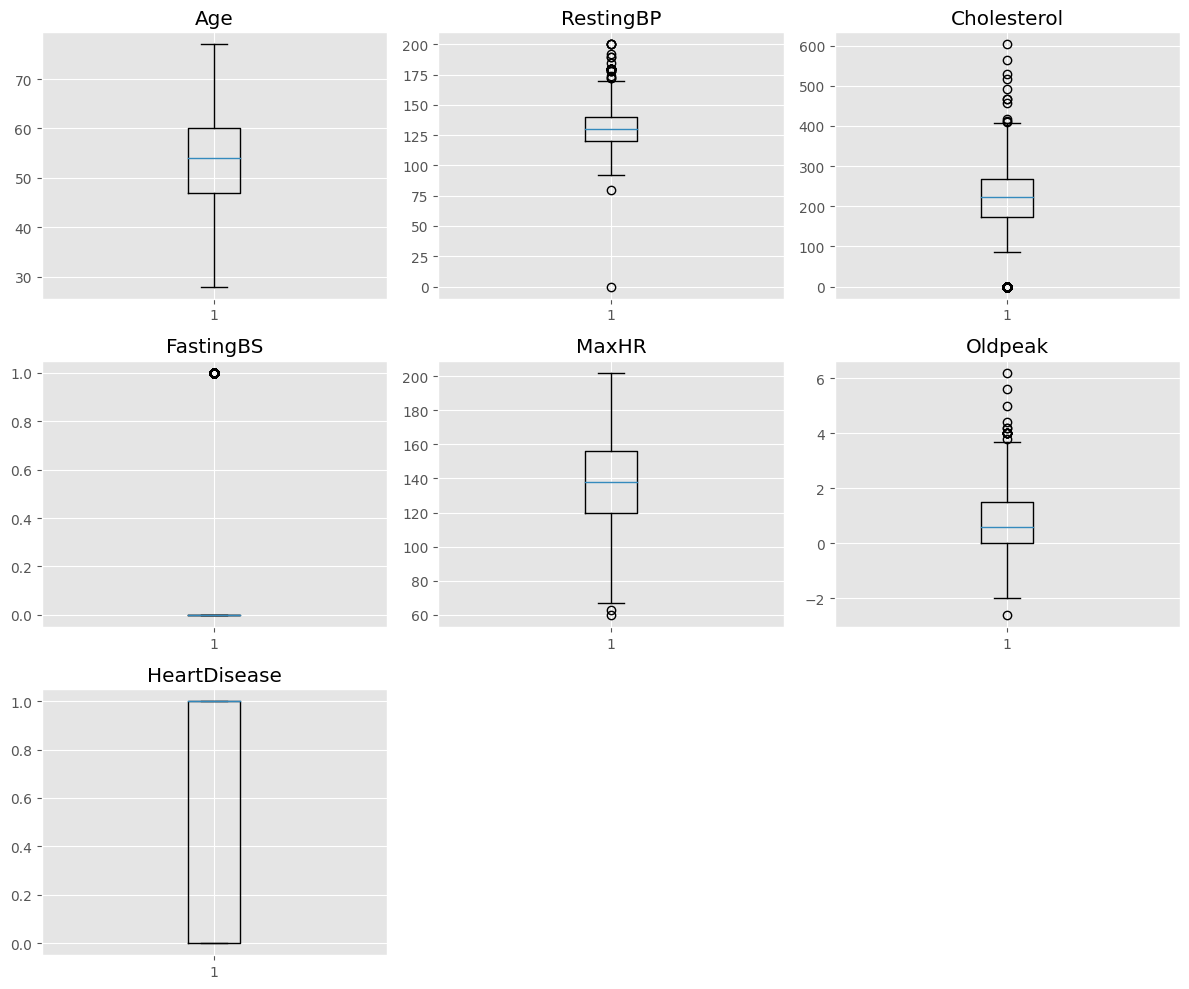

In [10]:
viz_df = df.select_dtypes(include = np.number)
k = 0
plt.figure(figsize=(12,10))
for col in viz_df.columns:
  plt.subplot(3,3,k+1)
  plt.boxplot(viz_df[col])
  plt.title(f"{col}")
  k+=1
plt.tight_layout()

In [12]:
categoricas = ('Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope')
for i in categoricas:
  print("Categorias de ",i,":",df[i].unique())

Categorias de  Sex : ['M' 'F']
Categorias de  ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
Categorias de  RestingECG : ['Normal' 'ST' 'LVH']
Categorias de  ExerciseAngina : ['N' 'Y']
Categorias de  ST_Slope : ['Up' 'Flat' 'Down']


In [17]:
maplist = [{'col':'Sex','mapping':{'M':0,'F':1}}]
enc = OrdinalEncoder(mapping = maplist)

In [20]:
df = enc.fit_transform(df)

In [ ]:
maplist = [{'col':'ExerciseAngina','mapping':{'N':0,'Y':1}}]
enc = OrdinalEncoder(mapping = maplist)
df = enc.fit_transform(df)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1
